In [64]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from pylab import rcParams
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='svg'

In [65]:
from  sklearn.neighbors import KNeighborsClassifier

In [66]:
x_train = pd.read_pickle('x_train.plk')
y_train = pd.read_pickle('y_train.plk')

x_valid = pd.read_pickle('x_valid.plk')
y_valid = pd.read_pickle('y_valid.plk')

x_train = x_train.drop('PassengerId', axis=1)
# y_train = y_train.drop('PassengerId', axis=1)
x_valid = x_valid.drop('PassengerId', axis=1)
# y_valid = y_valid.drop('PassengerId', axis=1)

In [67]:
from sklearn.preprocessing import RobustScaler

In [68]:
cols_for_scale = ['Age','SibSp','Parch','Fare']

In [69]:
scaler = RobustScaler()

In [70]:
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])

In [74]:
x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
x_valid[cols_for_scale] = scaler.transform(x_valid[cols_for_scale])

In [77]:
c_vals = np.arange(2,10)
accuracy_valid = []
accuracy_train = []
for val in c_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)

    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train,y_pred_train)

    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    print('n_neighbors={} \n\tacc_valid = {} \n\tacc_train = {}'.format(val, acc_valid, acc_train))

n_neighbors=2 
	acc_valid = 0.7937219730941704 
	acc_train = 0.8772455089820359
n_neighbors=3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.875748502994012
n_neighbors=4 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8458083832335329
n_neighbors=5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8637724550898204
n_neighbors=6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652
n_neighbors=7 
	acc_valid = 0.7847533632286996 
	acc_train = 0.8323353293413174
n_neighbors=8 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8173652694610778
n_neighbors=9 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778


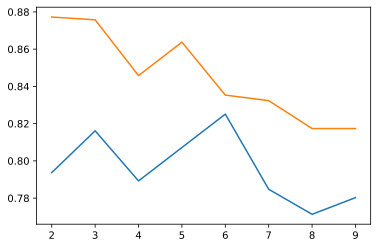

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='svg'
plt.plot(c_vals, accuracy_valid)
plt.plot(c_vals, accuracy_train)

In [82]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_valid)
accuracy_score(y_valid, y_pred)

0.8161434977578476

In [84]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [85]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(y_valid, y_pred)

array([[115,  19],
       [ 22,  67]], dtype=int64)

In [88]:
cm = confusion_matrix(y_valid, y_pred)/y_valid.shape[0]
cm

array([[0.51569507, 0.08520179],
       [0.09865471, 0.30044843]])